<a href="https://colab.research.google.com/github/BUCKERS99/C7082---Assignment/blob/main/Assignment_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google drive needs to be mounted
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import keras

from keras import backend as K  
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping 
from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import one_hot
from tensorflow.keras.applications import xception
from tensorflow.keras.preprocessing import image

import gc
import glob

np.random.seed(99)

In [ ]:
# Define directories for training and test images
base_path = '/content/drive/MyDrive/C7082 Assignment/Ordered_leaf '

train_data_path = os.path.join(base_path, 'Train/')
val_data_path = os.path.join(base_path, 'Validate/')
test_data_path = os.path.join(base_path, 'Test/')

In [ ]:
list_paths = glob.glob(train_data_path + '*')
disease = [i.replace(train_data_path,'') for i in list_paths]
print(disease)

['Late', 'Early', 'Healthy']


In [ ]:
for i in disease:
    print(i + ': ' + str(len(os.listdir(train_data_path + i))) + ' photographs')

Late: 800 photographs
Early: 800 photographs
Healthy: 773 photographs


# Model 1 - VGG16


In [ ]:
# Rescale images 
train_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Generate images for model
print("Total images in training data set:")
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size = (150, 150),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True
)

print("Total images in validation data set")
val_generator = val_datagen.flow_from_directory(
    val_data_path,
    target_size = (150, 150),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True
)

Total images in training data set:
Found 2373 images belonging to 3 classes.
Total images in validation data set
Found 297 images belonging to 3 classes.


In [ ]:
pretrained_base_1 = VGG16(input_shape = (150, 150, 3),
                          include_top = False,
                          weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in pretrained_base_1,layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop


x = layers.Flatten()(pretrained_base_1.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(3, activation='softmax')(x)

model_1 = tf.keras.models.Model(pretrained_base_1.input, x)

model_1.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
vgghist = model_1.fit(train_generator, validation_data = val_generator, steps_per_epoch= 50, epochs= 10)

Epoch 1/10
50/50 [==============================] - 472s 9s/step - loss: 0.4536 - acc: 0.8112 - val_loss: 0.6840 - val_acc: 0.7677
Epoch 2/10
50/50 [==============================] - 421s 8s/step - loss: 0.1981 - acc: 0.9269 - val_loss: 0.9709 - val_acc: 0.7609
Epoch 3/10
50/50 [==============================] - 412s 8s/step - loss: 0.1490 - acc: 0.9530 - val_loss: 1.1665 - val_acc: 0.7677
Epoch 4/10
50/50 [==============================] - 408s 8s/step - loss: 0.1211 - acc: 0.9536 - val_loss: 1.0972 - val_acc: 0.7744
Epoch 5/10
50/50 [==============================] - 409s 8s/step - loss: 0.0920 - acc: 0.9720 - val_loss: 1.1251 - val_acc: 0.7946
Epoch 6/10
50/50 [==============================] - 409s 8s/step - loss: 0.0835 - acc: 0.9701 - val_loss: 1.2157 - val_acc: 0.7946
Epoch 7/10
50/50 [==============================] - 407s 8s/step - loss: 0.0637 - acc: 0.9777 - val_loss: 1.1589 - val_acc: 0.8013
Epoch 8/10
50/50 [==============================] - 409s 8s/step - loss: 0.0680 - a

code adapted from: https://www.tensorflow.org/tutorials/images/classification 
and
https://arxiv.org/pdf/1409.1556.pdf

Plot this to see how well its doing

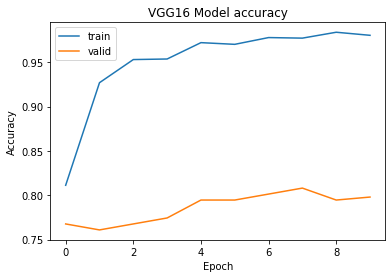

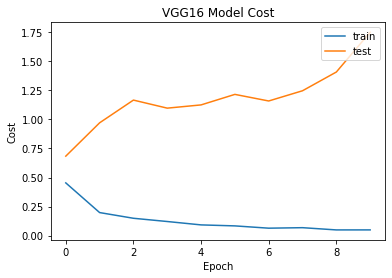

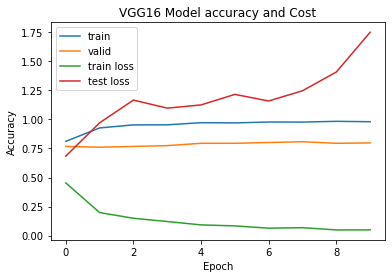

In [ ]:
plt.plot(vgghist.history['acc'], label='train') #training accuracy
plt.plot(vgghist.history['val_acc'], label='valid') #validation accuracy
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('VGG16_model_accuracy.png')

plt.plot(vgghist.history['loss'], label='train')
plt.plot(vgghist.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('VGG16 Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('VGG16_model_loss.png')

plt.plot(vgghist.history['acc'], label='train') #training accuracy
plt.plot(vgghist.history['val_acc'], label='valid') #validation accuracy
plt.plot(vgghist.history['loss'], label='train loss')
plt.plot(vgghist.history['val_loss'], label='test loss')
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('VGG16 Model accuracy and Cost')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('VGG16_model_accuracy_and_loss.png')

This shows that with the training data very high accuracy was achieved, but when the validation data was added it showed signs of overfitting.

# Model 2 - Xception

In [ ]:
pretrained_base_2 = xception.Xception(input_shape=[150, 150, 3], include_top=False)
pretrained_base_2.trainable = False

In [ ]:
# Create full model with new densely connected classifier
model_2 = tf.keras.Sequential([
    pretrained_base_2, # this is the pretrained Xception base from above 
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.BatchNormalization(trainable = True, axis = 1),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.BatchNormalization(trainable = True, axis = 1),
    
    tf.keras.layers.Dense(3,activation = 'softmax') # this should be number of classes?
])

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
 batch_normalization_8 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5

In [ ]:
# Compile model with optimiser, loss and metrics
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
result = model_2.fit(train_generator,
                    epochs = 10,
                   verbose = 1,
                   steps_per_epoch= 50,
                   validation_data = val_generator)

Epoch 1/10
50/50 [==============================] - 152s 3s/step - loss: 0.0700 - accuracy: 0.9775 - val_loss: 1.0193 - val_accuracy: 0.7980
Epoch 2/10
50/50 [==============================] - 147s 3s/step - loss: 0.0526 - accuracy: 0.9803 - val_loss: 1.3582 - val_accuracy: 0.7879
Epoch 3/10
50/50 [==============================] - 149s 3s/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 1.4617 - val_accuracy: 0.7811
Epoch 4/10
50/50 [==============================] - 150s 3s/step - loss: 0.0534 - accuracy: 0.9784 - val_loss: 1.0870 - val_accuracy: 0.7845
Epoch 5/10
50/50 [==============================] - 152s 3s/step - loss: 0.0547 - accuracy: 0.9794 - val_loss: 1.5528 - val_accuracy: 0.7778
Epoch 6/10
50/50 [==============================] - 148s 3s/step - loss: 0.0577 - accuracy: 0.9787 - val_loss: 1.0452 - val_accuracy: 0.7879
Epoch 7/10
50/50 [==============================] - 146s 3s/step - loss: 0.0460 - accuracy: 0.9844 - val_loss: 1.4608 - val_accuracy: 0.7845
Epoch 8/10
50

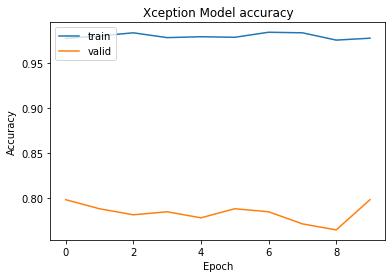

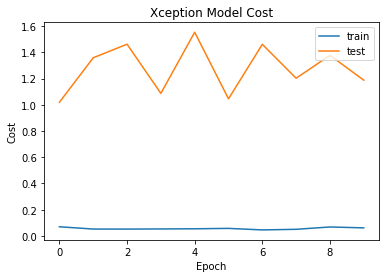

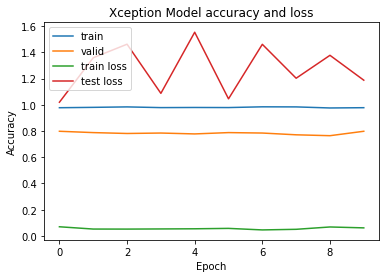

In [ ]:
plt.plot(result.history['accuracy'], label='train') #training accuracy
plt.plot(result.history['val_accuracy'], label='valid') #validation accuracy
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('Xception Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('xception_model_accuracy.png')

plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Xception Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('xception_model_loss.png')

plt.plot(result.history['accuracy'], label='train') #training accuracy
plt.plot(result.history['val_accuracy'], label='valid') #validation accuracy
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='test loss')
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('Xception Model accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('xception_model_accuracy_and_loss.png')

#Model 3 - Inception v3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model_3 = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model_3.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.models.Model(base_model_3.input, x)

model_3.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
incep_result = model_3.fit(train_generator, validation_data = val_generator, steps_per_epoch = 50, epochs = 10)


Epoch 1/10
50/50 [==============================] - 89s 2s/step - loss: 0.2650 - acc: 0.6313 - val_loss: 0.8520 - val_acc: 0.6128
Epoch 2/10
50/50 [==============================] - 89s 2s/step - loss: 0.1546 - acc: 0.7458 - val_loss: 0.7937 - val_acc: 0.6857
Epoch 3/10
50/50 [==============================] - 88s 2s/step - loss: 0.1178 - acc: 0.7349 - val_loss: 1.0934 - val_acc: 0.5713
Epoch 4/10
50/50 [==============================] - 87s 2s/step - loss: 0.0949 - acc: 0.6525 - val_loss: 0.9342 - val_acc: 0.5589
Epoch 5/10
50/50 [==============================] - 87s 2s/step - loss: 0.0719 - acc: 0.7309 - val_loss: 0.9091 - val_acc: 0.6285
Epoch 6/10
50/50 [==============================] - 87s 2s/step - loss: 0.0452 - acc: 0.7258 - val_loss: 1.0769 - val_acc: 0.6566
Epoch 7/10
50/50 [==============================] - 87s 2s/step - loss: 0.0441 - acc: 0.7432 - val_loss: 1.7016 - val_acc: 0.5780
Epoch 8/10
50/50 [==============================] - 88s 2s/step - loss: 0.0396 - acc: 0.76

 Plot this
 

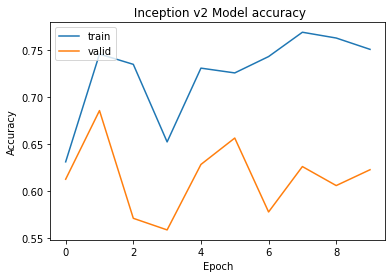

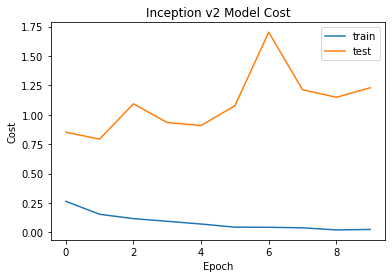

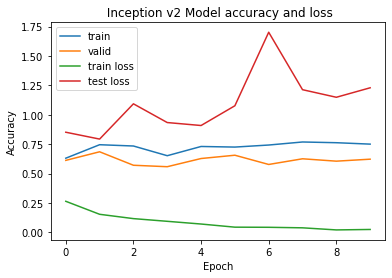

In [ ]:
plt.plot(incep_result.history['acc'], label='train') #training accuracy
plt.plot(incep_result.history['val_acc'], label='valid') #validation accuracy
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title(' Inception v2 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_accuracy.png')

plt.plot(incep_result.history['loss'], label='train')
plt.plot(incep_result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Inception v2 Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_loss.png')

plt.plot(incep_result.history['acc'], label='train') #training accuracy
plt.plot(incep_result.history['val_acc'], label='valid') #validation accuracy
plt.plot(incep_result.history['loss'], label='train loss')
plt.plot(incep_result.history['val_loss'], label='test loss')
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title(' Inception v2 Model accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_accuracy_and_loss.png')

# Model tuning

Taking the model that showed the least accuracy to see if tuning it can increase its accuracy to over the base accuracy of the best run model. In this canse I am tuning Model 1 - Inception v3 as its highest validation accuracy was 81.5%. I will try to increase its accuracy to over 83.8% which was recorded by Model 2 - Xception.

Increasing the learning rate of inception from 0.0001 to 0.0005

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_1 = tf.keras.models.Model(base_model_3.input, x)

model_3_1.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
incep_result_1 = model_3_1.fit(train_generator, validation_data = val_generator, steps_per_epoch = 50, epochs = 10)


Epoch 1/10
50/50 [==============================] - 93s 2s/step - loss: 0.7343 - acc: 0.6806 - val_loss: 1.1829 - val_acc: 0.6700
Epoch 2/10
50/50 [==============================] - 90s 2s/step - loss: 0.2755 - acc: 0.7584 - val_loss: 0.7278 - val_acc: 0.7666
Epoch 3/10
50/50 [==============================] - 91s 2s/step - loss: 0.2003 - acc: 0.7890 - val_loss: 0.9651 - val_acc: 0.7318
Epoch 4/10
50/50 [==============================] - 92s 2s/step - loss: 0.1392 - acc: 0.8389 - val_loss: 1.1001 - val_acc: 0.7969
Epoch 5/10
50/50 [==============================] - 92s 2s/step - loss: 0.1145 - acc: 0.8434 - val_loss: 2.5504 - val_acc: 0.6835
Epoch 6/10
50/50 [==============================] - 89s 2s/step - loss: 0.1080 - acc: 0.8159 - val_loss: 1.2121 - val_acc: 0.7598
Epoch 7/10
50/50 [==============================] - 98s 2s/step - loss: 0.1112 - acc: 0.8542 - val_loss: 1.6976 - val_acc: 0.8451
Epoch 8/10
50/50 [==============================] - 96s 2s/step - loss: 0.1068 - acc: 0.91

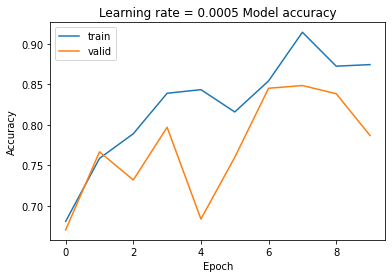

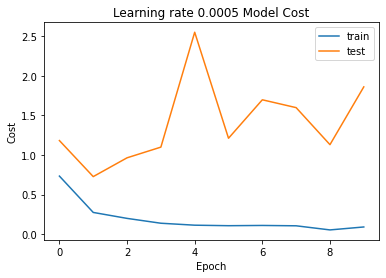

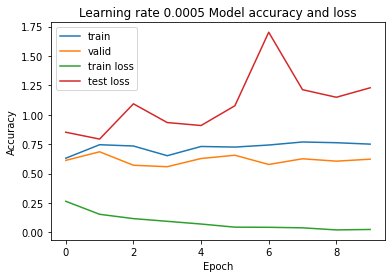

In [ ]:
plt.plot(incep_result_1.history['acc'], label='train') #training accuracy
plt.plot(incep_result_1.history['val_acc'], label='valid') #validation accuracy
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('Learning rate = 0.0005 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('lr0.005_accuracy.png')

plt.plot(incep_result_1.history['loss'], label='train')
plt.plot(incep_result_1.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Learning rate 0.0005 Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('lr0.0055l_loss.png')

plt.plot(incep_result.history['acc'], label='train') #training accuracy
plt.plot(incep_result.history['val_acc'], label='valid') #validation accuracy
plt.plot(incep_result.history['loss'], label='train loss')
plt.plot(incep_result.history['val_loss'], label='test loss')
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title('Learning rate 0.0005 Model accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('LR0.0005_accuracy_and_loss.png')

Softmax change and early stopping


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='softmax')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_2 = tf.keras.models.Model(base_model_3.input, x)

model_3_2.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min')

incep_result_2 = model_3_2.fit(train_generator, validation_data = val_generator, steps_per_epoch = 50, epochs = 10, callbacks = es)


Epoch 1/10
50/50 [==============================] - 91s 2s/step - loss: 1.0834 - acc: 0.3890 - val_loss: 1.0821 - val_acc: 0.3333
Epoch 2/10
50/50 [==============================] - 88s 2s/step - loss: 1.0632 - acc: 0.5127 - val_loss: 1.0761 - val_acc: 0.5488


Changing the batch size from 32 to 64.

In [ ]:
# Generate images for model
print("Total images in training data set:")
train_generator_1 = train_datagen.flow_from_directory(
    train_data_path,
    target_size = (150, 150),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 64,
    shuffle = True
)

print("Total images in validation data set")
val_generator_1 = val_datagen.flow_from_directory(
    val_data_path,
    target_size = (150, 150),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 64,
    shuffle = True
)

Total images in training data set:
Found 2373 images belonging to 3 classes.
Total images in validation data set
Found 297 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_3 = tf.keras.models.Model(base_model_3.input, x)

model_3_3.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'min')

incep_result_3 = model_3_3.fit(train_generator_1, validation_data = val_generator_1, steps_per_epoch = 25, epochs = 10)



Epoch 1/10
25/25 [==============================] - 97s 4s/step - loss: 0.1413 - acc: 0.7904 - val_loss: 1.0237 - val_acc: 0.7026
Epoch 2/10
25/25 [==============================] - 82s 3s/step - loss: 0.1182 - acc: 0.8235 - val_loss: 0.7723 - val_acc: 0.7890
Epoch 3/10
25/25 [==============================] - 84s 3s/step - loss: 0.1233 - acc: 0.8505 - val_loss: 1.3394 - val_acc: 0.7531
Epoch 4/10
25/25 [==============================] - 86s 3s/step - loss: 0.1026 - acc: 0.8206 - val_loss: 0.9846 - val_acc: 0.6622
Epoch 5/10
25/25 [==============================] - 86s 3s/step - loss: 0.0582 - acc: 0.8583 - val_loss: 2.1934 - val_acc: 0.7497
Epoch 6/10
25/25 [==============================] - 89s 4s/step - loss: 0.0636 - acc: 0.8585 - val_loss: 3.1162 - val_acc: 0.7385
Epoch 7/10
25/25 [==============================] - 82s 3s/step - loss: 0.2008 - acc: 0.8414 - val_loss: 1.5515 - val_acc: 0.6779
Epoch 8/10
25/25 [==============================] - 84s 3s/step - loss: 0.0112 - acc: 0.82

Increasing the learning rate further to 0.001

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_4 = tf.keras.models.Model(base_model_3.input, x)

model_3_4.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
# back to original generator and 50 steps per epoch
incep_result_4 = model_3_4.fit(train_generator, validation_data = val_generator, steps_per_epoch = 50, epochs = 10)

Epoch 1/10
50/50 [==============================] - 91s 2s/step - loss: 2.2308 - acc: 0.4802 - val_loss: 0.5122 - val_acc: 0.5387
Epoch 2/10
50/50 [==============================] - 92s 2s/step - loss: 0.3007 - acc: 0.6660 - val_loss: 1.0371 - val_acc: 0.5937
Epoch 3/10
50/50 [==============================] - 93s 2s/step - loss: 0.2967 - acc: 0.5692 - val_loss: 0.6399 - val_acc: 0.4119
Epoch 4/10
50/50 [==============================] - 91s 2s/step - loss: 0.1910 - acc: 0.6717 - val_loss: 1.1084 - val_acc: 0.6768
Epoch 5/10
50/50 [==============================] - 96s 2s/step - loss: 0.1957 - acc: 0.7942 - val_loss: 1.1263 - val_acc: 0.7654
Epoch 6/10
50/50 [==============================] - 93s 2s/step - loss: 0.1313 - acc: 0.8426 - val_loss: 1.2207 - val_acc: 0.7037
Epoch 7/10
50/50 [==============================] - 97s 2s/step - loss: 0.1646 - acc: 0.8606 - val_loss: 1.4243 - val_acc: 0.6611
Epoch 8/10
50/50 [==============================] - 92s 2s/step - loss: 0.1625 - acc: 0.85

Reverting to tune 1 paramenters and increasing the steps per epoch to 75

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_5 = tf.keras.models.Model(base_model_3.input, x)

model_3_5.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:

incep_result_5 = model_3_5.fit(train_generator, validation_data = val_generator, steps_per_epoch = 75, epochs = 10)

Epoch 1/10
75/75 [==============================] - 127s 2s/step - loss: 0.2112 - acc: 0.7795 - val_loss: 1.1795 - val_acc: 0.6925
Epoch 2/10
75/75 [==============================] - 127s 2s/step - loss: 0.1374 - acc: 0.8494 - val_loss: 1.0991 - val_acc: 0.7868
Epoch 3/10
75/75 [==============================] - 132s 2s/step - loss: 0.1445 - acc: 0.8761 - val_loss: 1.4323 - val_acc: 0.7767
Epoch 4/10
75/75 [==============================] - 132s 2s/step - loss: 0.0809 - acc: 0.8895 - val_loss: 1.8090 - val_acc: 0.7273
Epoch 5/10
75/75 [==============================] - 131s 2s/step - loss: 0.0709 - acc: 0.8480 - val_loss: 1.8657 - val_acc: 0.7969
Epoch 6/10
75/75 [==============================] - 131s 2s/step - loss: 0.0636 - acc: 0.9086 - val_loss: 1.0172 - val_acc: 0.8507
Epoch 7/10
75/75 [==============================] - 127s 2s/step - loss: 0.0477 - acc: 0.9476 - val_loss: 2.1501 - val_acc: 0.8429
Epoch 8/10
75/75 [==============================] - 127s 2s/step - loss: 0.0637 - a

Increasing image size to 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model_3_6 = InceptionV3(input_shape = (200, 200, 3), include_top = False, weights = 'imagenet')

In [ ]:
# increase image size
print("Total images in training data set:")
train_generator_6 = train_datagen.flow_from_directory(
    train_data_path,
    target_size = (200, 200),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True
)

print("Total images in validation data set")
val_generator_6 = val_datagen.flow_from_directory(
    val_data_path,
    target_size = (200, 200),
    color_mode = "rgb",
    classes = disease,
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True
)

Total images in training data set:
Found 2373 images belonging to 3 classes.
Total images in validation data set
Found 297 images belonging to 3 classes.


In [ ]:
for layer in base_model_3_6.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3_6.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_6 = tf.keras.models.Model(base_model_3_6.input, x)

model_3_6.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
incep_result_6 = model_3_6.fit(train_generator_6, validation_data = val_generator_6, steps_per_epoch = 75, epochs = 10)

Epoch 1/10
75/75 [==============================] - 238s 3s/step - loss: 0.9762 - acc: 0.6981 - val_loss: 0.8326 - val_acc: 0.7003
Epoch 2/10
75/75 [==============================] - 235s 3s/step - loss: 0.2510 - acc: 0.7401 - val_loss: 0.8344 - val_acc: 0.6981
Epoch 3/10
75/75 [==============================] - 233s 3s/step - loss: 0.1687 - acc: 0.7602 - val_loss: 1.3665 - val_acc: 0.6970
Epoch 4/10
75/75 [==============================] - 235s 3s/step - loss: 0.1083 - acc: 0.8028 - val_loss: 1.1644 - val_acc: 0.7015
Epoch 5/10
75/75 [==============================] - 233s 3s/step - loss: 0.1174 - acc: 0.7317 - val_loss: 1.5130 - val_acc: 0.6947
Epoch 6/10
75/75 [==============================] - 235s 3s/step - loss: 0.0923 - acc: 0.8248 - val_loss: 1.8384 - val_acc: 0.7946
Epoch 7/10
75/75 [==============================] - 233s 3s/step - loss: 0.0699 - acc: 0.8153 - val_loss: 2.1112 - val_acc: 0.7239
Epoch 8/10
75/75 [==============================] - 243s 3s/step - loss: 0.0768 - a

Increasing dense layers  with the relu activation from 1024 to 2048

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model_3.output)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model_3_7 = tf.keras.models.Model(base_model_3.input, x)

model_3_7.compile(optimizer = RMSprop(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
incep_result_7 = model_3_7.fit(train_generator, validation_data = val_generator, steps_per_epoch = 75, epochs = 10)

Epoch 1/10
75/75 [==============================] - 141s 2s/step - loss: 0.9528 - acc: 0.6661 - val_loss: 0.5752 - val_acc: 0.8013
Epoch 2/10
75/75 [==============================] - 140s 2s/step - loss: 0.2631 - acc: 0.8399 - val_loss: 1.2281 - val_acc: 0.7059
Epoch 3/10
75/75 [==============================] - 140s 2s/step - loss: 0.1442 - acc: 0.8779 - val_loss: 1.1680 - val_acc: 0.8384
Epoch 4/10
75/75 [==============================] - 145s 2s/step - loss: 0.1222 - acc: 0.9098 - val_loss: 1.2702 - val_acc: 0.7991
Epoch 5/10
75/75 [==============================] - 142s 2s/step - loss: 0.1037 - acc: 0.8913 - val_loss: 1.6175 - val_acc: 0.7598
Epoch 6/10
75/75 [==============================] - 142s 2s/step - loss: 0.1040 - acc: 0.9247 - val_loss: 2.1428 - val_acc: 0.8395
Epoch 7/10
75/75 [==============================] - 141s 2s/step - loss: 0.0592 - acc: 0.9639 - val_loss: 1.9156 - val_acc: 0.8575
Epoch 8/10
75/75 [==============================] - 142s 2s/step - loss: 0.0716 - a

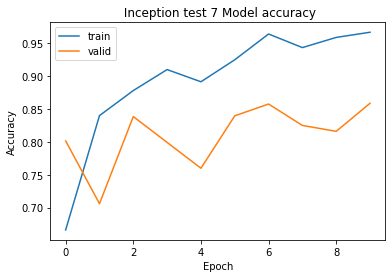

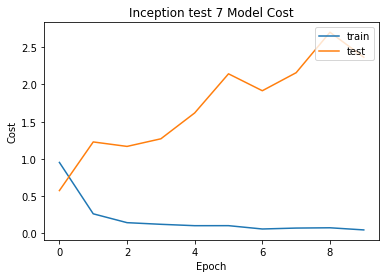

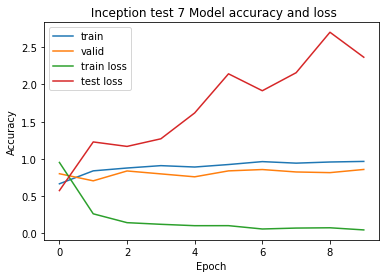

In [ ]:
plt.plot(incep_result_7.history['acc'], label='train') #training accuracy
plt.plot(incep_result_7.history['val_acc'], label='valid') #validation accuracy
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title(' Inception test 7 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_7_accuracy.png')

plt.plot(incep_result_7.history['loss'], label='train')
plt.plot(incep_result_7.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Inception test 7 Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_7_loss.png')

plt.plot(incep_result_7.history['acc'], label='train') #training accuracy
plt.plot(incep_result_7.history['val_acc'], label='valid') #validation accuracy
plt.plot(incep_result_7.history['loss'], label='train loss')
plt.plot(incep_result_7.history['val_loss'], label='test loss')
plt.legend(loc='upper left') #show a ledgend for line colour in the upper left corner
plt.title(' Inception test 7 Model accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# plt.savefig('inception_model_7_accuracy_and_loss.png')